<a href="https://colab.research.google.com/github/dnevo/Practicum/blob/master/S06_Data_Collection_SQL_%E2%80%93_hypothesis_on_taxi_rides_duration_on_rainy_day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Hi Doron,

I have checked you work and left comments in such cells. Cells are of two types:

<div class="alert alert-block alert-danger">
<p> <strong> A red colored cell </strong> indicates that you need to improve or adjust part of the project above. </p>
</div>
<div class="alert alert-block alert-info">
<p> <strong> A blue colored cell </strong> indicates that no improvements are needed in the cells above. May include some suggestions and recommendations.</p>
</div>

Hope it all will be clear to you :)

Project is accepted :)

*Good luck!*

------------

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:11,.2f}'.format

## Step 4. Exploratory data analysis

**project_sql_result_01.csv**:
- company_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017.

In [5]:
companies_trips = pd.read_csv('https://raw.githubusercontent.com/dnevo/Practicum/master/datasets/project_sql_result_01.csv')
companies_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
companies_trips.describe()

,trips_amount
count,64.00
mean,"2,145.48"
std,"3,812.31"
min,2.00
25%,20.75
50%,178.50
75%,"2,106.50"
max,"19,558.00"


**Trips per companies:** As can be noted in the quartiles above and the bar plot bellow, the distribution is very squewed, with the top 10 companies (out of 64 in total), dominating the market. The company 'Flash Cab' is top one, with almost double number of trips than the next one.

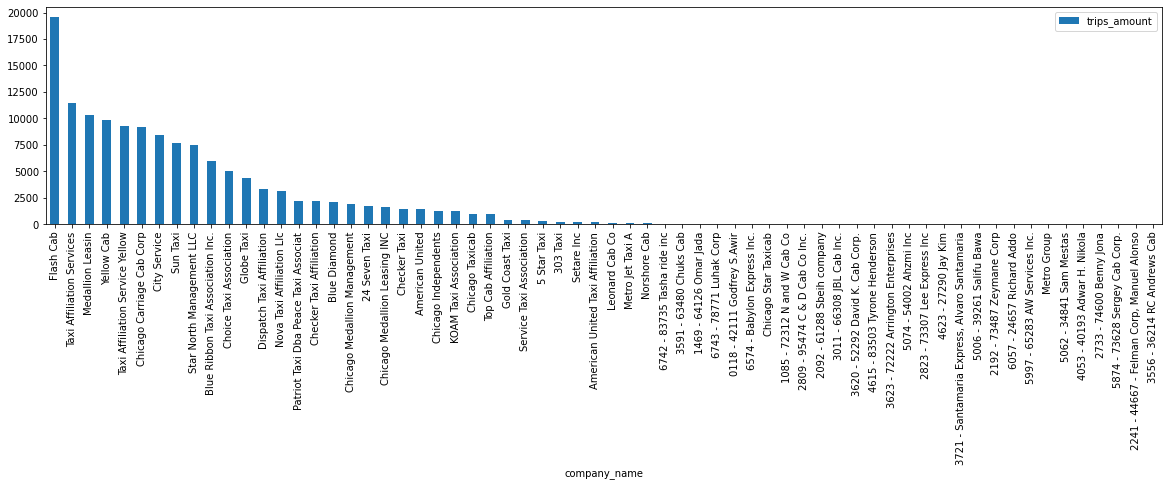

In [7]:
companies_trips.plot(kind='bar', x='company_name',y='trips_amount',figsize=(20,4));

**project_sql_result_04.csv**:
- dropoff_location_name: Chicago neighborhoods where rides ended
- average_trips: the average number of rides that ended in each neighborhood in November 2017.

In [8]:
dropoffs = pd.read_csv('https://raw.githubusercontent.com/dnevo/Practicum/master/datasets/project_sql_result_04.csv')
dropoffs.head()

,dropoff_location_name,average_trips
0,Loop,"10,727.47"
1,River North,"9,523.67"
2,Streeterville,"6,664.67"
3,West Loop,"5,163.67"
4,O'Hare,"2,546.90"


In [9]:
dropoffs.describe()

,average_trips
count,94.00
mean,599.95
std,"1,714.59"
min,1.80
25%,14.27
50%,52.02
75%,298.86
max,"10,727.47"


**dropoff locations distribution:** the distribution of the 94 locations is very squewed, with first 4 locations taking most of the drops.

### The top 10 neighborhoods in terms of drop-offs:

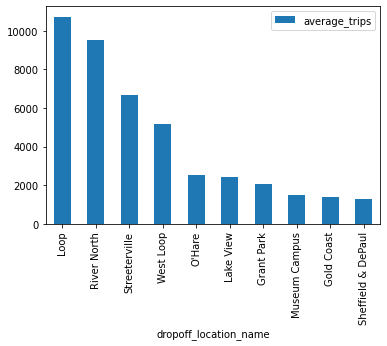

In [10]:
dropoffs.sort_values(by='average_trips',ascending=False).head(10).plot(kind='bar', x='dropoff_location_name',y='average_trips');

**project_sql_result_07.csv** - data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:
- start_ts: pickup date and time
- weather_conditions: weather conditions at the moment the ride started
- duration_seconds: ride duration in seconds

Note: all the dates are for Saturdays (and not for Sundays as described in the instructions..)

In [11]:
trips = pd.read_csv('https://raw.githubusercontent.com/dnevo/Practicum/master/datasets/project_sql_result_07.csv',parse_dates=['start_ts'])
trips.head(7)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,"2,410.00"
1,2017-11-25 14:00:00,Good,"1,920.00"
2,2017-11-25 12:00:00,Good,"1,543.00"
3,2017-11-04 10:00:00,Good,"2,512.00"
4,2017-11-11 07:00:00,Good,"1,440.00"
5,2017-11-11 04:00:00,Good,"1,320.00"
6,2017-11-04 16:00:00,Bad,"2,969.00"


As can be note below, it is quite clear that average ride duration in 'Bad' weather is longer that in case of 'Good' weather.

In [12]:
durations_bad = trips[trips['weather_conditions']=='Bad']['duration_seconds']
print('Bad weather durations:n={:d}, mean={:.2f}'.format(len(durations_bad),durations_bad.mean()))

durations_good = trips[trips['weather_conditions']=='Good']['duration_seconds']
print('Good weather durations:n={:d}, mean={:.2f}'.format(len(durations_good),durations_good.mean()))

Bad weather durations:n=180, mean=2427.21
Good weather durations:n=888, mean=1999.68


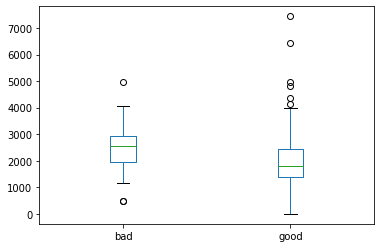

In [13]:
pd.DataFrame({'bad':durations_bad,'good':durations_good}).plot(kind='box');

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Good :)

Do not forget to name graphs and their axis :)

------------

## Step 5. Testing hypotheses

#### Testing hypothesis that Average rides duration in case of rainy Sunday is NOT higher than in case of non-rainy Sunday
The formulation we use:
- H0: Average rides duration in case of rainy Sunday IS NOT higher than in case of non-rainy Sunday.
- H1: Average rides duration in case of rainy Sunday IS higher than in case of non-rainy Sunday.

In [14]:
from scipy import stats as st

alpha = .05 # critical statistical significance
results = st.ttest_ind(
        durations_bad, 
        durations_good, equal_var=False)
print('p-value: ', results.pvalue / 2)  # one-sided test: p-value will be halved
if (results.pvalue / 2 < alpha):
        print("H0 rejected: Average rides duration in case of rainy Sunday IS higher than in case of non-rainy Sunday")
else:
        print("H0 cannot be rejected: Average rides duration in case of rainy Sunday IS NOT higher than in case of non-rainy Sunday")

p-value:  3.369497163054367e-12
H0 rejected: Average rides duration in case of rainy Sunday IS higher than in case of non-rainy Sunday


<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

------------

## Final conclusions

- There are 64 companies, but the top 10 companies take the majority of the rides, with 'Flash Cab' having  almost double number of trips than the next one.
- Most of the drops are to 4 locations (out of 94).
- The weather in Chicago is 'not so bad' - 888 rides in Good weather compared to 180 in bad weather.
- The average ride duration is longer in case of Bad weather - 2427 secs (40 minutes) compared to 1999 secs (33 minutes)

<div class="alert alert-block alert-info">
<h2> Comments </h2>
</div>

Okay :)

------------